In [21]:
import numpy as np
import scipy.stats as stats
import scipy

import matplotlib
import matplotlib.pyplot as plt

import os

import plotting

from numpy.random import default_rng

In [22]:
seed = 909

img_dir = "images/"

In [23]:
rng = default_rng() # seed=seed)

d = 2
n = 2
x_0 = np.zeros(d)
C = rng.normal(size=(d, d), scale=.1)
Lambda = C.T @ C * 100
x_dist = stats.multivariate_normal(mean=x_0, cov=Lambda, seed=rng)
beta_star = rng.standard_normal(size=d)

X = x_dist.rvs(size=n)
y = X @ beta_star
beta_bar = X.T @ np.linalg.inv(X @ X.T) @ y if d >= n else np.linalg.inv(X.T @ X) @ X.T @ y

# U = np.sort(np.linalg.eigvals(Lambda))[::-1]
# T = np.sort(np.linalg.eigvals(X.T @ X))[::-1] / n
U, U_vecs = np.linalg.eig(Lambda)
T, T_vecs = np.linalg.eig(X.T @ X / n)

U = np.real(U)
T = np.real(T)

U_angle = np.arctan2(np.real(U_vecs[-1, 0]), np.real(U_vecs[0, 0])) * 180 / np.pi
T_angle = np.arctan2(np.real(T_vecs[-1, 0]), np.real(T_vecs[0, 0])) * 180 / np.pi


print(f"Real eigen values: (angle: {U_angle})\n[{U[0]} ... {U[-1]}]")
print(f"Empirical eigen values: (angle: {T_angle})\n[{T[0]} ... {T[-1]}]")

print(f"beta_star: {beta_star}")
print(f"beta_bar: {beta_bar}")
print(f"Equal? {np.allclose(beta_star, beta_bar)}, Image? {np.allclose(X @ beta_star, X @ beta_bar)}")

Real eigen values: (angle: -40.7417399922692)
[1.63314951945623 ... 0.10196897618829726]
Empirical eigen values: (angle: -135.79118023717004)
[0.023759396488415074 ... 1.5397499163134292]
beta_star: [ 1.63364749 -0.57592308]
beta_bar: [ 1.63364749 -0.57592308]
Equal? True, Image? True


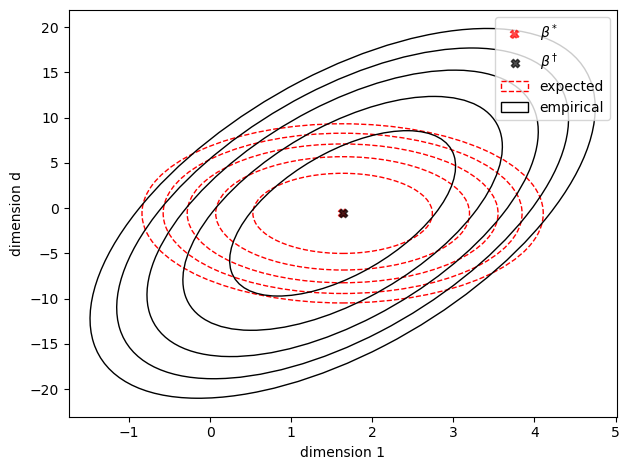

In [24]:
fig, ax = plt.subplots(layout="tight")

ax.scatter(beta_star[0], beta_star[-1], marker='X', color="red", ls="--", label=r"$\beta^*$", alpha=0.7)
ax.scatter(beta_bar[0], beta_bar[-1], marker='X', color="black", label=r"$\beta^\dagger$", alpha=0.7)

alphas = np.linspace(10, 0, 5, endpoint=False)
plotting.draw_alpha_levels(ax, beta_star[[0, -1]], U[[0, -1]], alphas, 0, ls="--", color="red", label="expected")
plotting.draw_alpha_levels(ax, beta_bar[[0, -1]], T[[0, -1]], alphas, T_angle - U_angle, label="empirical")

ax.legend(loc="upper right")
ax.set_xlabel("dimension 1")
ax.set_ylabel("dimension d")
# ax.grid("on")
# ax.set_aspect("equal", "box")

path = os.path.join(img_dir, "expected_vs_empirical_levels.pdf")
fig.savefig(path)

plt.show()

1 0
[2.02609438e+01 2.45542258e-16]
[[-0.09430984 -0.01208275]
 [-0.46301777 -0.81069153]
 [ 0.17575445 -0.47323499]
 [-0.33077175  0.07689305]
 [-0.79775976  0.3358115 ]]
(5, 2) (2, 2)


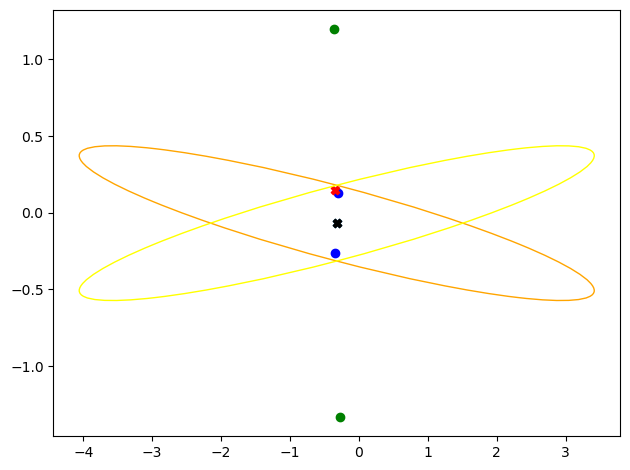

In [205]:
X_ = x_dist.rvs(size=n)
T_, T_vecs_ = np.linalg.eig(X_.T @ X_ / n)
beta_bar_ = X.T @ np.linalg.inv(X @ X.T) @ y if d >= n else np.linalg.inv(X.T @ X) @ X.T @ y

T_ = np.real(T_)
T_angle_ = np.arctan2(np.real(T_vecs_[-1, 0]), np.real(T_vecs_[0, 0])) * 180 / np.pi


fig, ax = plt.subplots(layout="tight")

ax.scatter(beta_bar_[0], beta_bar_[-1], marker='X')

low_eig_idx, high_eig_idx = np.argsort(T_[[0, -1]])
print(low_eig_idx, high_eig_idx)
print(T[[0, -1]])
x_, y_ = np.sqrt(1 / T_[[0, -1]])

lowest, highest = None, None
if low_eig_idx == 0:
    lowest = np.array([[x_, 0], [-x_, 0]]) 
    highest = np.array([[0, y_], [0, -y_]])
else:
    highest = np.array([[x_, 0], [-x_, 0]]) 
    lowest = np.array([[0, y_], [0, -y_]])

rot = T_vecs_[:, [0, -1]]
print(rot)
print(rot.shape, lowest.shape)
lowest = (lowest @ rot.T)[:, [0, -1]] + beta_bar_[[0, -1]]
highest = (highest @ rot.T)[:, [0, -1]] + beta_bar_[[0, -1]]

ax.scatter(lowest[:, 0], lowest[:, 1], color="green")
ax.scatter(highest[:, 0], highest[:, 1], color="blue")

ax.scatter(beta_bar[0], beta_bar[-1], marker='X', color="black")
ax.scatter(beta_star[0], beta_star[-1], marker='X', color="red")
# ax.scatter(x_, beta_bar_[-1])
# ax.scatter(beta_bar_[0], y_)
draw_alpha_levels(ax, beta_bar_[[0, -1]], T_[[0, -1]], [1], T_angle_, color="orange")
draw_alpha_levels(ax, beta_bar_[[0, -1]], T_[[0, -1]], [1], -T_angle_, color="yellow")

# ax.set_aspect("equal", "box")
plt.show()

In [161]:
n_iter = 1_000
low_hist, high_hist = np.empty(0), np.empty(0)
for k in range(n_iter):
    new_x = x_dist.rvs(size=n)
    M = new_x.T @ new_x
    eigs = np.linalg.eigvals(M)
    hist = np.append(hist, eigs[~np.isclose(eigs, 0)])
    # print(eigs[~np.isclose(eigs, 0)])

fig, ax = plt.subplots(layout="tight")

plt.show()

NameError: name 'hist' is not defined